In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.impute import SimpleImputer
from sklearn.metrics import confusion_matrix, accuracy_score, RocCurveDisplay, precision_score, recall_score, f1_score, roc_auc_score, classification_report
from sklearn.tree import DecisionTreeClassifier, export_text, plot_tree, export_graphviz
from sklearn.ensemble import RandomForestClassifier
import pickle

In [2]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
pd.set_option('display.float_format', lambda x: '%.3f' % x)

In [3]:
train_df = pd.read_csv('datasets/train.csv')

In [4]:
train_df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.000,NaN,360.000,1.000,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.000,128.000,360.000,1.000,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.000,66.000,360.000,1.000,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.000,120.000,360.000,1.000,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.000,141.000,360.000,1.000,Urban,Y


## Data Exploration

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
train_df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000,614.000,592.000,600.000,564.000
mean,5403.459,1621.246,146.412,342.000,0.842
std,6109.042,2926.248,85.587,65.120,0.365
min,150.000,0.000,9.000,12.000,0.000
25%,2877.500,0.000,100.000,360.000,1.000
50%,3812.500,1188.500,128.000,360.000,1.000
75%,5795.000,2297.250,168.000,360.000,1.000
max,81000.000,41667.000,700.000,480.000,1.000


In [7]:
train_df.describe(exclude=[np.number])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,601,611,599,614,582,614,614
unique,614,2,2,4,2,2,3,2
top,LP001002,Male,Yes,0,Graduate,No,Semiurban,Y
freq,1,489,398,345,480,500,233,422


In [8]:
train_df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
train_df['Dependents'].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [10]:
train_df['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [11]:
train_df['Credit_History'].value_counts()

1.000    475
0.000     89
Name: Credit_History, dtype: int64

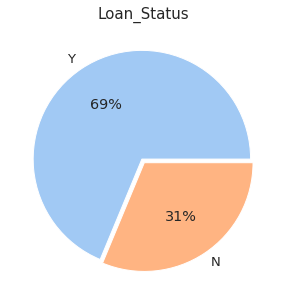

In [12]:
sns.set(rc={'figure.figsize': [7, 5]}, font_scale=1.2)
plt.title('Loan_Status', fontsize=15)
explode = [0.02, 0.02]
data = list(train_df['Loan_Status'].value_counts().values)
labels = list(train_df['Loan_Status'].value_counts().index)
colors = sns.color_palette('pastel')[0:5]
plt.pie(data, labels = labels, colors = colors, autopct='%.0f%%', explode=explode);

- Imbalanced dataset

## Data Preprocessing 
> Missing value imputation (mean for numerical and mode for categorical))

In [13]:
# copy dataframe
cp_df = train_df.copy()

In [14]:
# Check duplicated records
cp_df.duplicated().sum()

0

In [15]:
cp_df.drop(['Loan_ID'], axis=1, inplace=True)

In [16]:
cp_df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

> ### Missing Values
>> #### Gender, Married, Dependents, Credit_History, Self_Employed
>>> Impute with mode

In [17]:
imputer = SimpleImputer(strategy='most_frequent')
cp_df['Gender'] = imputer.fit_transform(cp_df[['Gender']])
cp_df['Married'] = imputer.fit_transform(cp_df[['Married']])
cp_df['Dependents'] = imputer.fit_transform(cp_df[['Dependents']])
cp_df['Credit_History'] = imputer.fit_transform(cp_df[['Credit_History']])
cp_df['Self_Employed'] = imputer.fit_transform(cp_df[['Self_Employed']])

In [18]:
cp_df[['Gender','Married','Dependents', 'Credit_History', 'Self_Employed']].isnull().sum()

Gender            0
Married           0
Dependents        0
Credit_History    0
Self_Employed     0
dtype: int64

>> #### LoanAmount, Loan_Amount_Term
>>> Impute with mean

In [19]:
imputer = SimpleImputer(strategy='mean')
cp_df['LoanAmount'] = imputer.fit_transform(cp_df[['LoanAmount']])
cp_df['Loan_Amount_Term'] = imputer.fit_transform(cp_df[['Loan_Amount_Term']])

In [20]:
cp_df.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

> ### Feature Encoding

In [21]:
categ_lst = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
cp_df = pd.get_dummies(cp_df, columns = categ_lst, drop_first=True)

In [22]:
labelencoder = preprocessing.LabelEncoder()
cp_df['Loan_Status'] = labelencoder.fit_transform(cp_df['Loan_Status'])

In [71]:
from sklearn.preprocessing import OneHotEncoder

# one hot encode categorical features
ohe = OneHotEncoder(handle_unknown='ignore')

In [23]:
cp_df.columns

Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'Gender_Male',
       'Married_Yes', 'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Education_Not Graduate', 'Self_Employed_Yes',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [24]:
cp_df.head(5)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.000,146.412,360.000,1.000,1,1,0,0,0,0,0,0,0,1
1,4583,1508.000,128.000,360.000,1.000,0,1,1,1,0,0,0,0,0,0
2,3000,0.000,66.000,360.000,1.000,1,1,1,0,0,0,0,1,0,1
3,2583,2358.000,120.000,360.000,1.000,1,1,1,0,0,0,1,0,0,1
4,6000,0.000,141.000,360.000,1.000,1,1,0,0,0,0,0,0,0,1


> ### Spliting Data

In [25]:
cols = list(cp_df.columns)
cols.remove('Loan_Status')

x_train, x_test, y_train, y_test = train_test_split(cp_df[cols].values, cp_df['Loan_Status'].values, test_size=0.2, random_state=42, shuffle=True, stratify=cp_df['Loan_Status'])

## Building Models 

In [26]:
def display_plt(clf, y_pred):
    fig, axes = plt.subplots(1, 2, figsize=(15, 5)) 
    fig.suptitle(str(clf.__class__.__name__)) 
    matrix_confusion = confusion_matrix(y_test, y_pred)
    sns.heatmap(matrix_confusion, square=True, annot=True, cmap='Blues', fmt='d', ax=axes[0])
    RocCurveDisplay.from_estimator(clf, x_test, y_test, pos_label=1, ax=axes[1])
    plt.show()
    
def scoring(clf, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    scores_dict={"Classifier": clf.__class__.__name__,
        "ACCURACY SCORE" : accuracy_score(y_test, y_pred),
        "PRECISION SCORE" : precision_score(y_test, y_pred),
        "RECALL SCORE" : recall_score(y_test, y_pred),
        "F1 SCORE" : f1_score(y_test, y_pred)}
    df = pd.DataFrame([scores_dict]).set_index(['Classifier'])
    return df

> ### Decision Trees

In [27]:
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf = dt_clf.fit(x_train, y_train)
y_pred = dt_clf.predict(x_test)

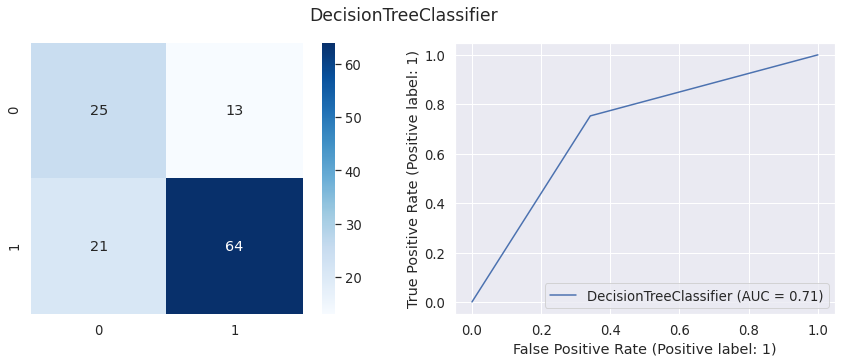

              precision    recall  f1-score   support

           0       0.54      0.66      0.60        38
           1       0.83      0.75      0.79        85

    accuracy                           0.72       123
   macro avg       0.69      0.71      0.69       123
weighted avg       0.74      0.72      0.73       123



,ACCURACY SCORE,PRECISION SCORE,RECALL SCORE,F1 SCORE
Classifier,,,,
DecisionTreeClassifier,0.724,0.831,0.753,0.790


In [28]:
display_plt(dt_clf, y_pred)
dt_df = scoring(dt_clf, y_pred)
print(classification_report(y_test, y_pred))
dt_df

In [29]:
y_train_pred = dt_clf.predict(x_train)
print("Training Data: \n",classification_report(y_train, y_train_pred))

Training Data: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       154
           1       1.00      1.00      1.00       337

    accuracy                           1.00       491
   macro avg       1.00      1.00      1.00       491
weighted avg       1.00      1.00      1.00       491



- Overfitting as the difference between training and testing scores, we will implement pruning

Text(0.6198557692307692, 0.86, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]\nclass = Y')

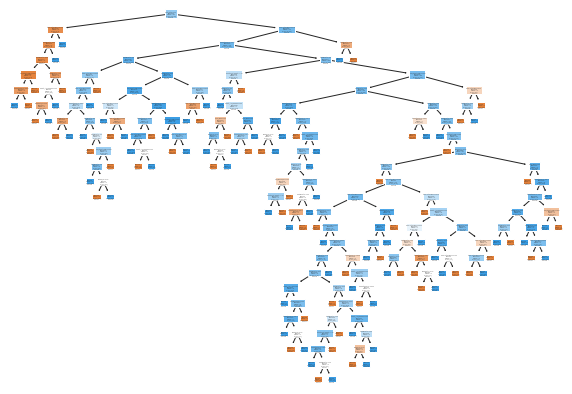

In [30]:
# === Displaying tree show intial overfitting ====
plt.figure(figsize=(10,7))
plot_tree(dt_clf, feature_names=cols, class_names=['Y', 'N'], filled=True)[-1]

In [31]:
# ==== Using cross validation k-fold 10 ===
x = cp_df[cols].values
y = cp_df['Loan_Status']

scores = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_micro': 'f1_macro'}
scores = cross_validate(estimator=dt_clf, X=x, y=y, cv=10, scoring=scores, return_train_score=True)

scores_dict = {}
for k in scores.keys():
    scores_dict[k] = round(scores[k].mean(), 3)

c_df = pd.DataFrame([scores_dict])
c_df

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_micro,train_f1_micro
0,0.002,0.002,0.707,1.000,0.662,1.000,0.661,1.000,0.659,1.000


- There is "Overvetting", training accuracy "1" and testing accuracy "0.707", same in recall, precision and f1 scores

> ### Random Forest

In [32]:
rf_clf = RandomForestClassifier(random_state=42)
rf_clf = rf_clf.fit(x_train, y_train)
y_pred = rf_clf.predict(x_test)

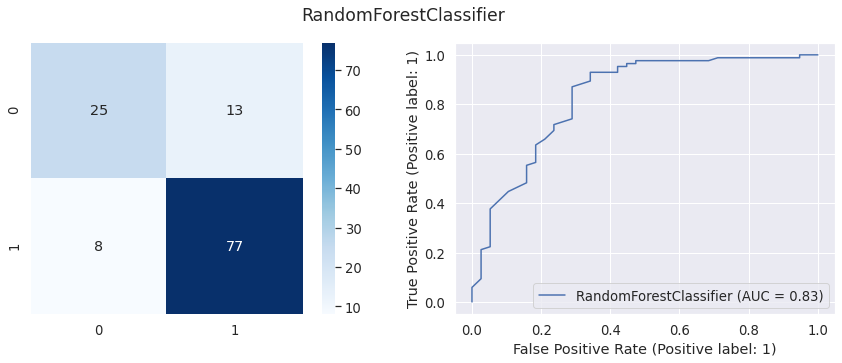

              precision    recall  f1-score   support

           0       0.76      0.66      0.70        38
           1       0.86      0.91      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.78      0.79       123
weighted avg       0.83      0.83      0.83       123



,ACCURACY SCORE,PRECISION SCORE,RECALL SCORE,F1 SCORE
Classifier,,,,
RandomForestClassifier,0.829,0.856,0.906,0.880


In [33]:
display_plt(rf_clf, y_pred)
rf_df = scoring(rf_clf, y_pred)
print(classification_report(y_test, y_pred))
rf_df

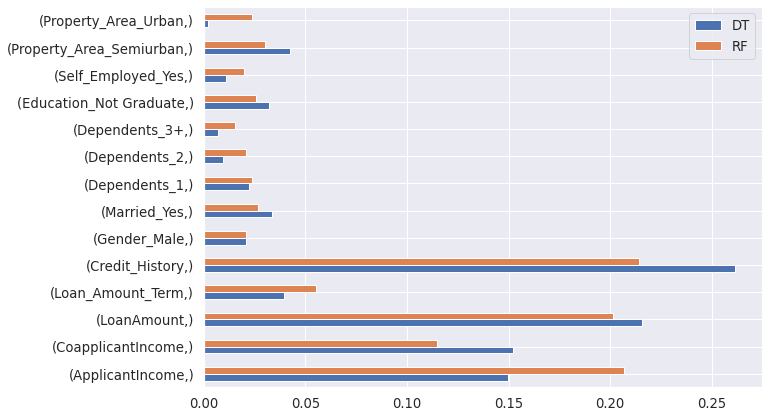

In [34]:
# === Feature Importance ===
sns.set(rc={'figure.figsize': [10, 7]}, font_scale=1.2)
df = pd.DataFrame({'DT': dt_clf.feature_importances_, 'RF': rf_clf.feature_importances_}, index=[cols])
ax = df.plot.barh()

- Both of classifiers are depending on "Credit History", "Loan Amount", but Random Forest depend on "Applicant Income" more than "Loan Amount"

> ### Comparing Classifiers

In [35]:
#=== Comparing two classifiers ===
pd.concat([dt_df, rf_df], axis=0)

,ACCURACY SCORE,PRECISION SCORE,RECALL SCORE,F1 SCORE
Classifier,,,,
DecisionTreeClassifier,0.724,0.831,0.753,0.790
RandomForestClassifier,0.829,0.856,0.906,0.880


- Random Forest is better than decision trees, specially in <b>RECALL</b> score

> ### Decision Trees Pruning 

In [36]:
# === Pruning ===
path = dt_clf.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

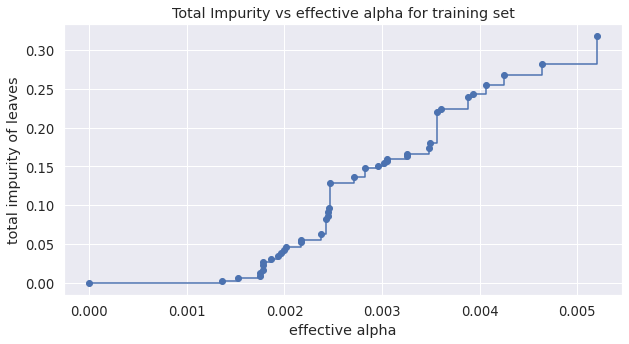

In [37]:
fig, ax = plt.subplots(figsize=(10,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");

In [38]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)

print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.11256404348913135


- Remove last alpha score "0.11256" for better visualization

<Figure size 720x360 with 0 Axes>

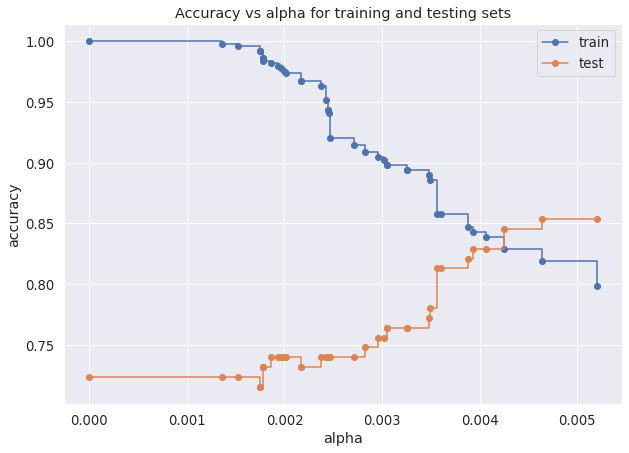

In [39]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]
plt.figure(figsize=(10,5))
fig, ax = plt.subplots()
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas[:-1], train_scores[:-1], marker="o", label="train", drawstyle="steps-post")
ax.plot(ccp_alphas[:-1], test_scores[:-1], marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show();

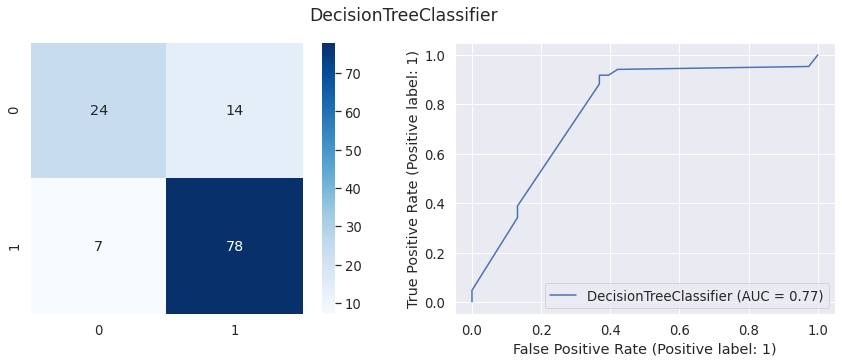

              precision    recall  f1-score   support

           0       0.77      0.63      0.70        38
           1       0.85      0.92      0.88        85

    accuracy                           0.83       123
   macro avg       0.81      0.77      0.79       123
weighted avg       0.83      0.83      0.82       123



,ACCURACY SCORE,PRECISION SCORE,RECALL SCORE,F1 SCORE
Classifier,,,,
DecisionTreeClassifier,0.829,0.848,0.918,0.881


In [40]:
# ==== Using ccp_alpha=0.00425 ====
p_dt_clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.00425)
p_dt_clf = p_dt_clf.fit(x_train, y_train)
y_pred = p_dt_clf.predict(x_test)
display_plt(p_dt_clf, y_pred)
p_dt_df = scoring(p_dt_clf, y_pred)
print(classification_report(y_test, y_pred))
p_dt_df

In [41]:
# ==== Using cross validation k-fold 10 ===
x = cp_df[cols].values
y = cp_df['Loan_Status']

scoring = {'acc': 'accuracy',
           'prec_macro': 'precision_macro',
           'rec_micro': 'recall_macro',
           'f1_micro': 'f1_macro'}
scores = cross_validate(estimator=p_dt_clf, X=x, y=y, cv=10, scoring=scoring, return_train_score=True)

scores_dict = {}
for k in scores.keys():
    scores_dict[k] = round(scores[k].mean(), 3)

c_p_df = pd.DataFrame([scores_dict])
c_p_df

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_micro,train_f1_micro
0,0.002,0.002,0.777,0.832,0.778,0.851,0.688,0.753,0.702,0.778


- After using prunning as regulization, overfitting is decreased as training score is "0.83" and testing score "0.78" also with precision, recall and f1 scores

Text(0.7352941176470589, 0.7222222222222222, 'gini = 0.375\nsamples = 4\nvalue = [3, 1]\nclass = Y')

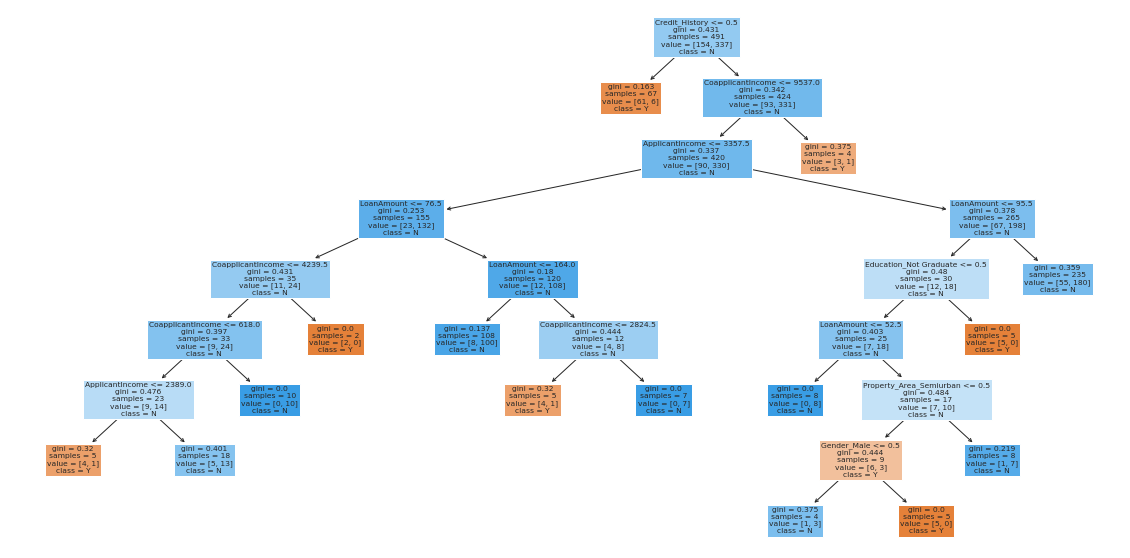

In [42]:
plt.figure(figsize=(20,10))
plot_tree(p_dt_clf, feature_names=cols, class_names=['Y', 'N'], filled=True)[-1]

- After prunning, tree used only 6 fearures (CreditHistory, CoapplicantIncome, ApplicantIcome, LoanAmount, EducationNotGraduate, PropertyAreaSimiUrban, GenderMale) instead of all 14 features

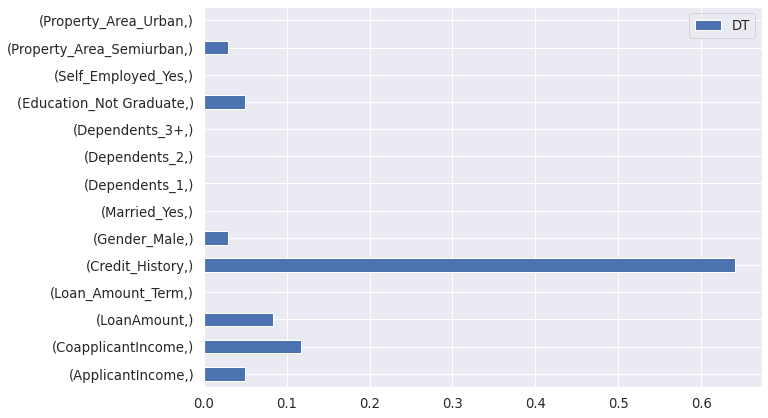

In [43]:
# === Feature importance after using pruning ===
df = pd.DataFrame({'DT': p_dt_clf.feature_importances_}, index=[cols])
ax = df.plot.barh()

- Increasing in "CoapplicantIncome" importance than "LoanAmount"

> ### Comparing all results

In [44]:
pd.concat([dt_df, rf_df, p_dt_df], axis=0)

,ACCURACY SCORE,PRECISION SCORE,RECALL SCORE,F1 SCORE
Classifier,,,,
DecisionTreeClassifier,0.724,0.831,0.753,0.790
RandomForestClassifier,0.829,0.856,0.906,0.880
DecisionTreeClassifier,0.829,0.848,0.918,0.881


- After prunning decision tree with alpha=0.00425, as shown in the above "Accuracy VS Alpha" chart that alpha with around "0.00425" has high scores in both training and testing, also the scores after pruning are close to the result of random forest, but without using cross-validation
- Still random forest is more accuracte, as the decision tree scores after using cross validation with 10 k-fold scores get lower as shown in the below dataframe 

In [45]:
# === Compare between decision tree scores before and after pruning ===
pd.concat([c_df, c_p_df], axis=0)

,fit_time,score_time,test_acc,train_acc,test_prec_macro,train_prec_macro,test_rec_micro,train_rec_micro,test_f1_micro,train_f1_micro
0,0.002,0.002,0.707,1.000,0.662,1.000,0.661,1.000,0.659,1.000
0,0.002,0.002,0.777,0.832,0.778,0.851,0.688,0.753,0.702,0.778
